In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-12 09:14:02.605598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 09:14:02.605729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 09:14:02.755598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading and Preprocessing the data

In [3]:
data=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [6]:
img_width=180
img_height=180

## Visualizing the Datset

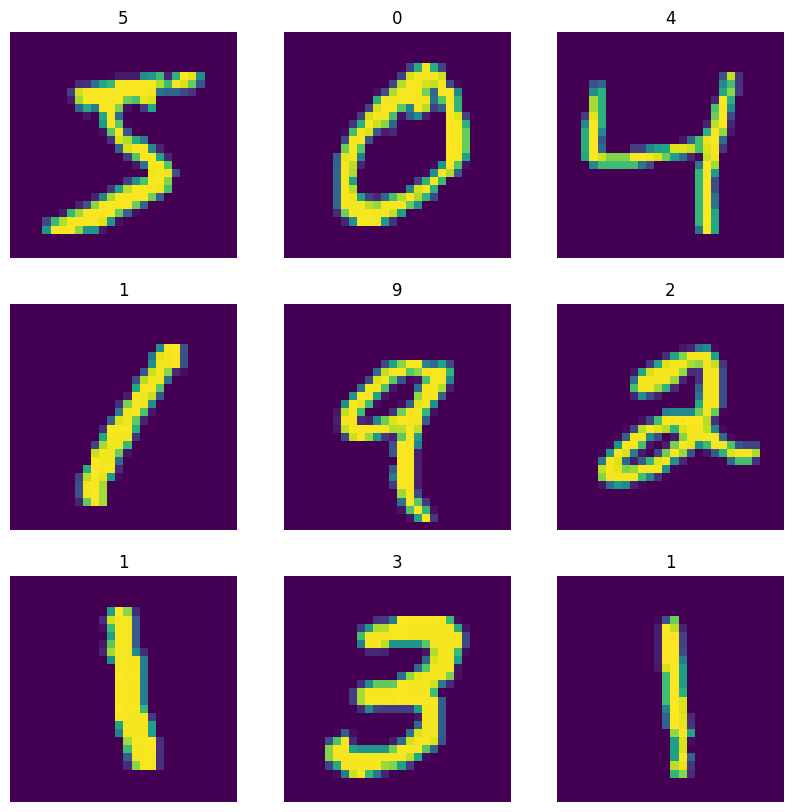

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

### Normalizing the data

In [8]:
x_train=x_train.reshape((x_train.shape[0],28,28))
x_test=x_test.reshape((x_test.shape[0],28,28))

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
import numpy as np
x_train=np.stack((x_train,)*3,axis=-1)
x_test=np.stack((x_test,)*3,axis=-1)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest')

## Applying the CNN model

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [13]:
Res=ResNet50(include_top=False,weights='imagenet',pooling='max')

94765736/94765736 [==============================] - 1s 0us/step


In [14]:
model = tf.keras.Sequential()
    

In [15]:
model.add(Res)

In [16]:
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [17]:
model.layers[0].trainable=False

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 24154058 (92.14 MB)
Trainable params: 566346 (2.16 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics='accuracy')

In [20]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, 
                    epochs=30,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/30
468/468 [==============================] - 85s 175ms/step - loss: 1.0706 - accuracy: 0.6398
Epoch 2/30
468/468 [==============================] - 81s 173ms/step - loss: 0.6703 - accuracy: 0.7749
Epoch 3/30
468/468 [==============================] - 79s 167ms/step - loss: 0.5586 - accuracy: 0.8141
Epoch 4/30
468/468 [==============================] - 82s 175ms/step - loss: 0.5029 - accuracy: 0.8322
Epoch 5/30
468/468 [==============================] - 83s 177ms/step - loss: 0.4532 - accuracy: 0.8497
Epoch 6/30
468/468 [==============================] - 82s 175ms/step - loss: 0.4317 - accuracy: 0.8565
Epoch 7/30
468/468 [==============================] - 82s 176ms/step - loss: 0.4102 - accuracy: 0.8645
Epoch 8/30
468/468 [==============================] - 82s 175ms/step - loss: 0.3931 - accuracy: 0.8701
Epoch 9/30
468/468 [==============================] - 83s 177ms/step - loss: 0.3735 - accuracy: 0.8779
Epoch 10/30
468/468 [==============================] - 81s 173ms/step - l

In [21]:
model.evaluate(datagen.flow(x_test, y_test, batch_size=128),
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

79/79 [==============================] - 15s 175ms/step - loss: 0.2256 - accuracy: 0.9240


[0.22561994194984436, 0.9240000247955322]

In [22]:
x_train.shape

(60000, 28, 28, 3)

In [23]:
pred=model.predict(x_test/255)

313/313 [==============================] - 19s 59ms/step


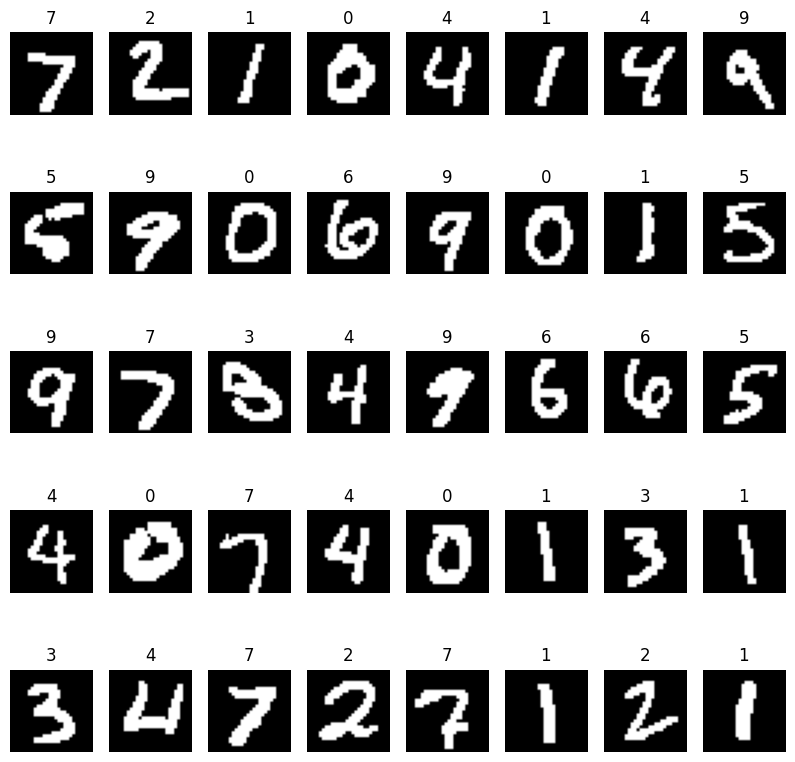

In [24]:
import pandas as pd
plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.imshow(x_test[i])
    plt.title(pd.Series(pred[i]).idxmax())
    plt.axis('off')
    